In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

All libraries loaded successfully...


In [ ]:
file_path = "dataset.csv"
df = pd.read_csv(file_path)

print("Dataset loaded properly.")
print("Shape of data:", df.shape)
print(df.head())


Dataset loaded properly.
Shape of data: (40433, 4)
           Unnamed: 0 Unnamed: 1 Unnamed: 2  \
0            category     rating      label   
1  Home_and_Kitchen_5          5         CG   
2  Home_and_Kitchen_5          5         CG   
3  Home_and_Kitchen_5          5         CG   
4  Home_and_Kitchen_5          1         CG   

                                          Unnamed: 3  
0                                              text_  
1  Love this!  Well made, sturdy, and very comfor...  
2  love it, a great upgrade from the original.  I...  
3  This pillow saved my back. I love the look and...  
4  Missing information on how to use it, but it i...  


In [ ]:
df = df.dropna()

# text cleaning
df['Unnamed: 3'] = df['Unnamed: 3'].astype(str)
df['Unnamed: 3'] = df['Unnamed: 3'].str.lower()
df['Unnamed: 3'] = df['Unnamed: 3'].str.replace('[^a-zA-Z ]', '', regex=True)

print("Cleaning done.")
print("Remaining rows:", len(df))


Cleaning done.
Remaining rows: 40433


In [12]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=6000)
X = vectorizer.fit_transform(df['Unnamed: 3']).toarray()

print("Vectorization completed.")
print("Vector shape:", X.shape)


Vectorization completed.
Vector shape: (40433, 6000)


In [17]:
le_cat = LabelEncoder()
y_cat = le_cat.fit_transform(df['Unnamed: 0'])

y_cat_encoded = to_categorical(y_cat)

print("Category labels encoded.")
print("Total categories:", len(le_cat.classes_))


Category labels encoded.
Total categories: 10


In [18]:
X = vectorizer.fit_transform(df['Unnamed: 3']).toarray()
y_cat = le_cat.fit_transform(df['Unnamed: 0'])
y_cat_encoded = to_categorical(y_cat)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat_encoded, test_size=0.2, random_state=42
)

print("Train-test split done for category model.")


Train-test split done for category model.


In [19]:
cat_model = Sequential()

cat_model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
cat_model.add(Dense(64, activation='relu'))
cat_model.add(Dense(y_train.shape[1], activation='softmax'))

cat_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Neural network model created.")


Neural network model created.


In [20]:
history = cat_model.fit(
    X_train, y_train,
    epochs=8,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

print("Category model training finished.")


Epoch 1/8
910/910 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7067 - loss: 0.8975 - val_accuracy: 0.7632 - val_loss: 0.6563
Epoch 2/8
910/910 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8467 - loss: 0.4418 - val_accuracy: 0.7626 - val_loss: 0.6775
Epoch 3/8
910/910 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8897 - loss: 0.3154 - val_accuracy: 0.7552 - val_loss: 0.7533
Epoch 4/8
910/910 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9203 - loss: 0.2368 - val_accuracy: 0.7440 - val_loss: 0.8797
Epoch 5/8
910/910 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9413 - loss: 0.1758 - val_accuracy: 0.7397 - val_loss: 0.9681
Epoch 6/8
910/910 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9568 - loss: 0.1301 - val_accuracy: 0.7406 - val_loss: 1.1058
Epoch 7/8
910/910 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9699 - loss: 0.0940 - val_accuracy: 0.7385 - val_loss: 1.2388
Epoch 8/8
910/910 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9794 - loss: 0.0674 - val_accuracy: 0.7320 -

In [24]:
y_pred = cat_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Accuracy:", accuracy_score(y_true, y_pred_classes))


253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.7387164585136639


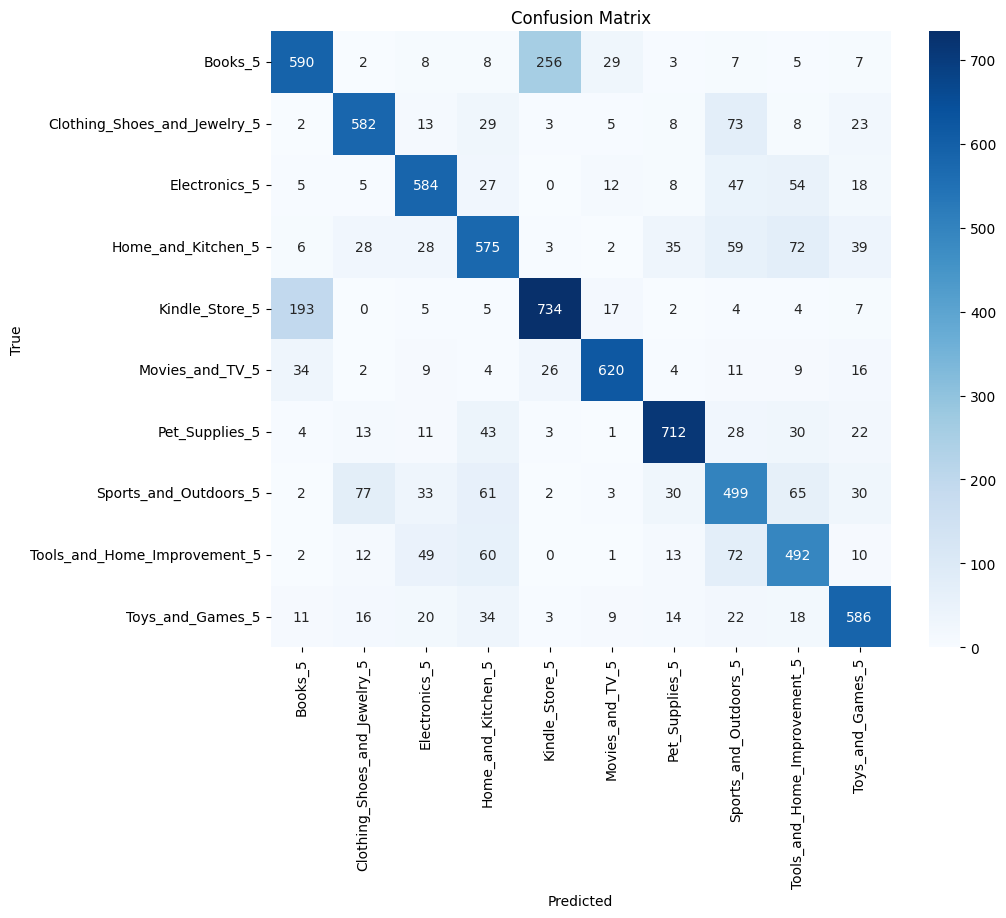

In [25]:
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le_cat.classes_, yticklabels=le_cat.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [27]:
le_fake = LabelEncoder()
y_fake = le_fake.fit_transform(df['Unnamed: 2'])


In [28]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y_fake, test_size=0.2, random_state=42
)

print("Train-test split done for fake review model.")


Train-test split done for fake review model.


In [29]:
fake_model = Sequential()

fake_model.add(Dense(128, activation='relu', input_shape=(X_train2.shape[1],)))
fake_model.add(Dense(64, activation='relu'))
fake_model.add(Dense(1, activation='sigmoid'))

fake_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("Fake review neural model created.")


Fake review neural model created.


In [30]:
fake_model.fit(
    X_train2, y_train2,
    epochs=8,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

print("Fake review model training completed.")


Epoch 1/8
910/910 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8489 - loss: 0.3458 - val_accuracy: 0.8569 - val_loss: 0.3074
Epoch 2/8
910/910 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9050 - loss: 0.2231 - val_accuracy: 0.8665 - val_loss: 0.2929
Epoch 3/8
910/910 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9434 - loss: 0.1403 - val_accuracy: 0.8776 - val_loss: 0.3419
Epoch 4/8
910/910 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9773 - loss: 0.0646 - val_accuracy: 0.8726 - val_loss: 0.4404
Epoch 5/8
910/910 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9917 - loss: 0.0263 - val_accuracy: 0.8726 - val_loss: 0.5797
Epoch 6/8
910/910 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9970 - loss: 0.0099 - val_accuracy: 0.8739 - val_loss: 0.6806
Epoch 7/8
910/910 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9987 - loss: 0.0040 - val_accuracy: 0.8720 - val_loss: 0.8050
Epoch 8/8
910/910 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9994 - loss: 0.0020 - val_accuracy: 0.8736

In [31]:
y_pred2 = fake_model.predict(X_test2)
y_pred2 = (y_pred2 > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test2, y_pred2))

253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.8706566093730679


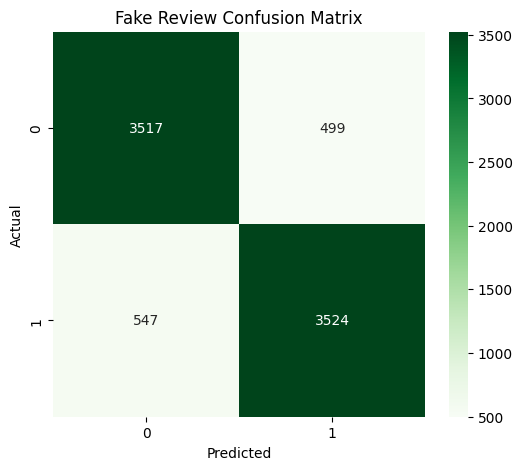

In [34]:
cm2 = confusion_matrix(y_test2, y_pred2)

plt.figure(figsize=(6,5))
sns.heatmap(cm2, cmap='Greens', annot=True, fmt='d')
plt.title("Fake Review Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

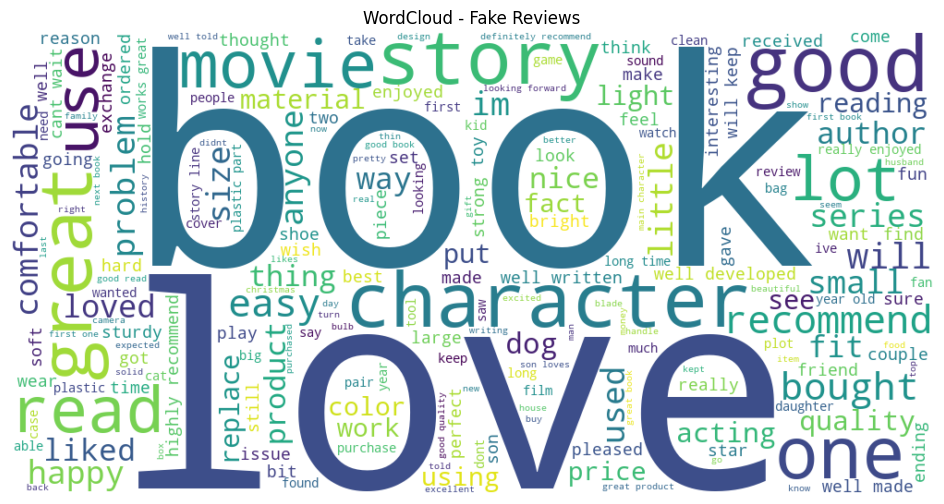

WordCloud generated for fake reviews.


In [36]:
# 'Unnamed: 2' is the label column, 'CG' or 'OR' (assumed: 'CG' = fake, 'OR' = original/real)
fake_reviews = df[df['Unnamed: 2'] == 'CG']['Unnamed: 3']
text_data = " ".join(fake_reviews)

wc = WordCloud(width=1000, height=500, background_color='white').generate(text_data)

plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud - Fake Reviews")
plt.show()

print("WordCloud generated for fake reviews.")


Generating WordCloud for each category...


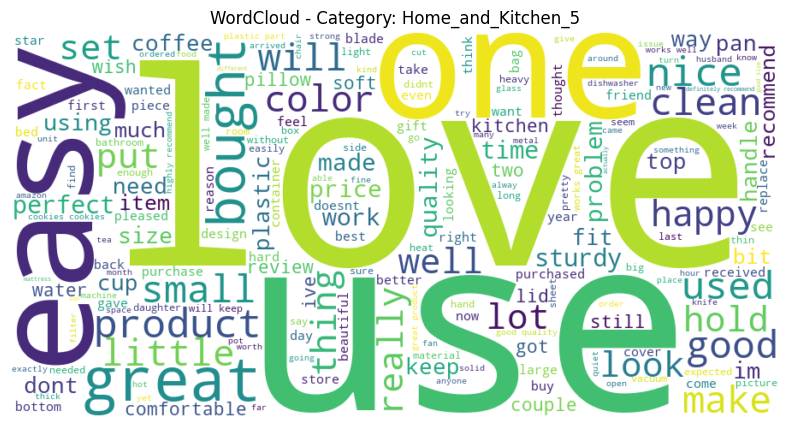

WordCloud created for category: Home_and_Kitchen_5


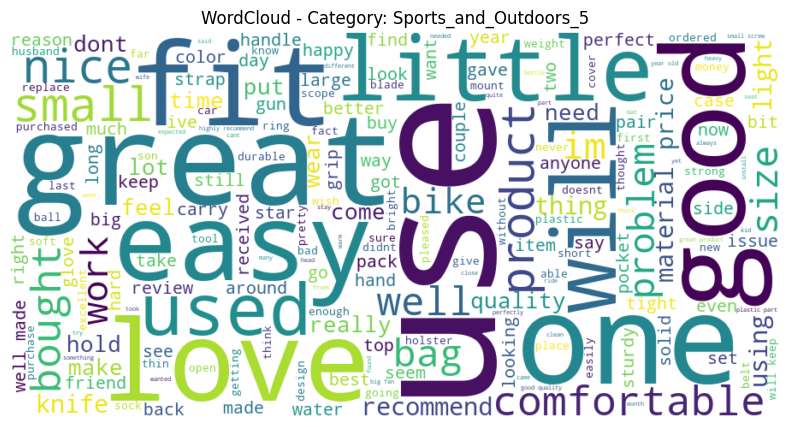

WordCloud created for category: Sports_and_Outdoors_5


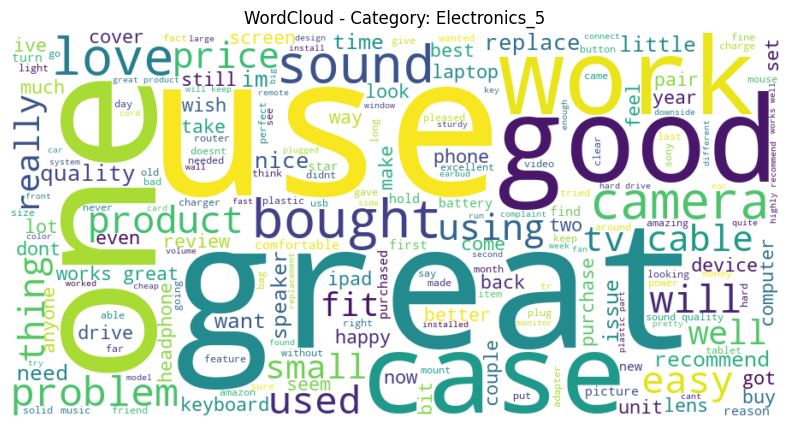

WordCloud created for category: Electronics_5


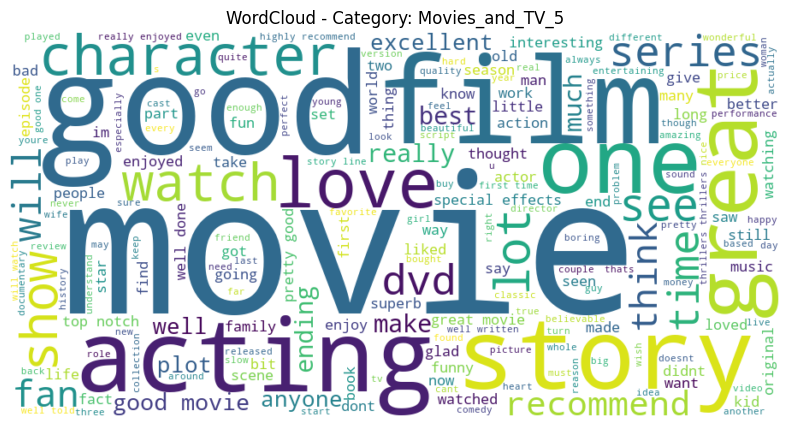

WordCloud created for category: Movies_and_TV_5


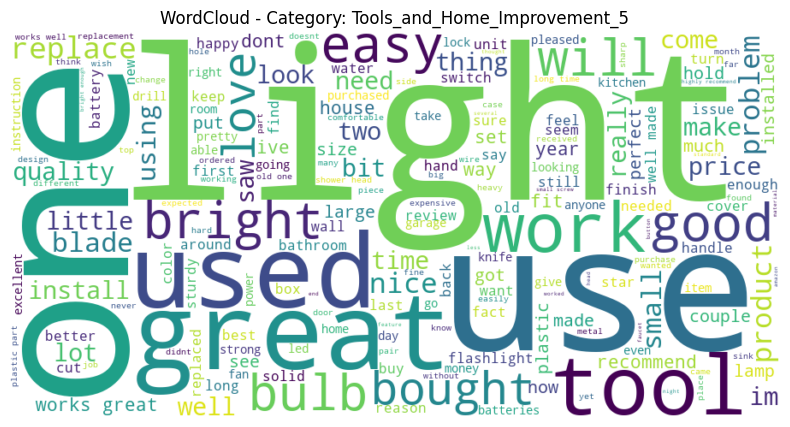

WordCloud created for category: Tools_and_Home_Improvement_5


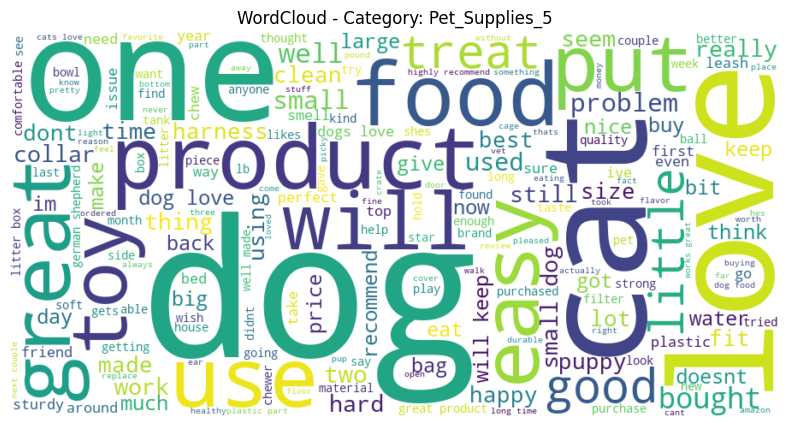

WordCloud created for category: Pet_Supplies_5


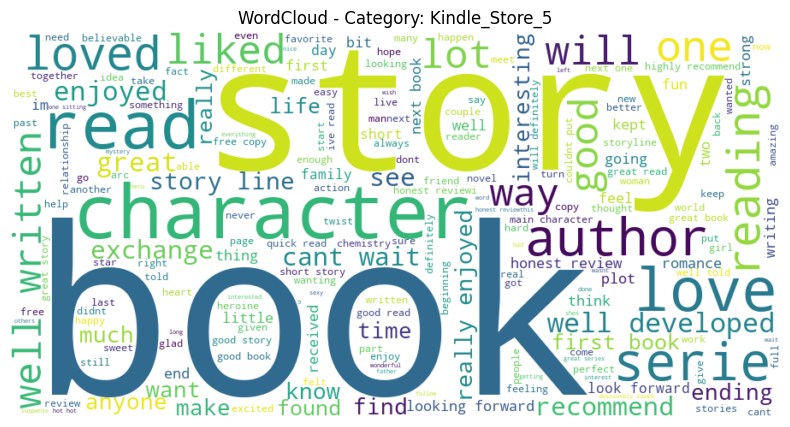

WordCloud created for category: Kindle_Store_5


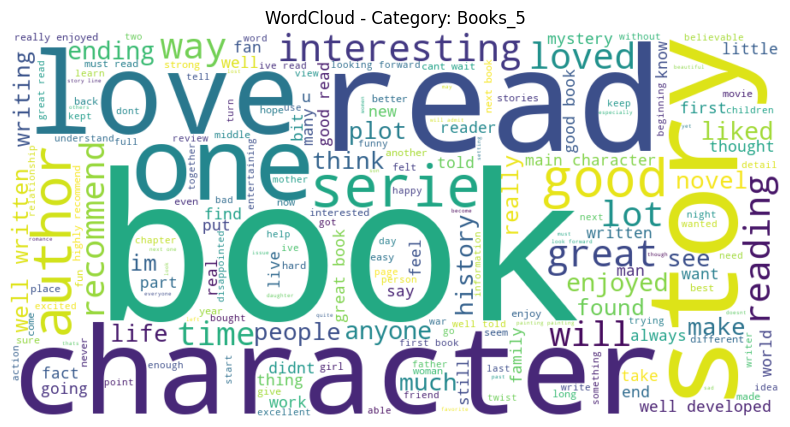

WordCloud created for category: Books_5


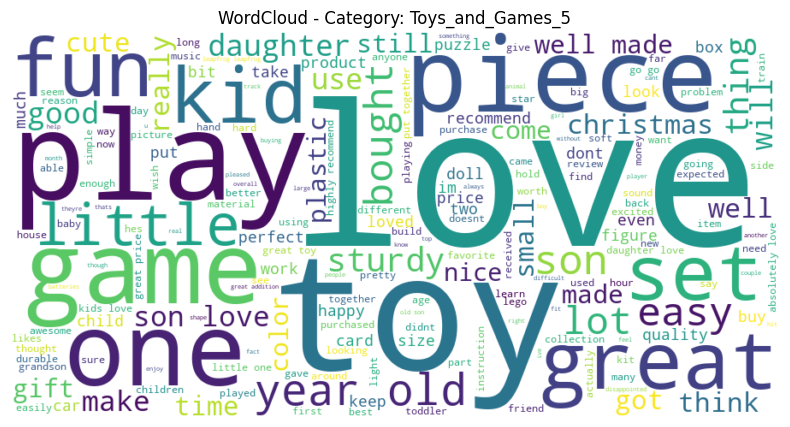

WordCloud created for category: Toys_and_Games_5


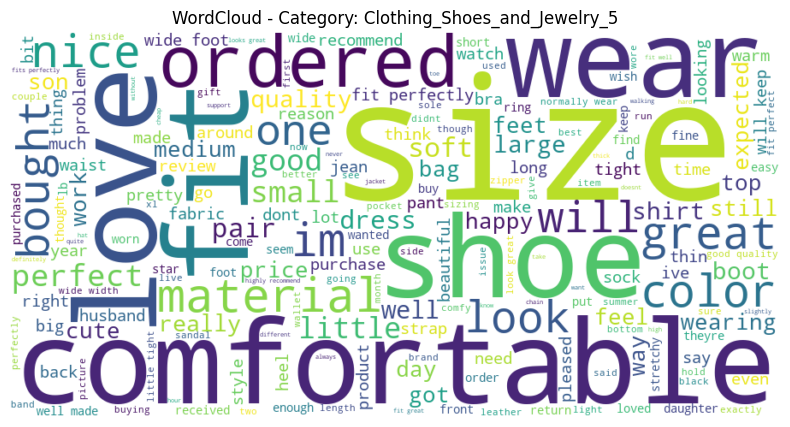

WordCloud created for category: Clothing_Shoes_and_Jewelry_5


In [38]:
categories = df['Unnamed: 0'].unique()

print("Generating WordCloud for each category...")

for cat in categories:
    cat_reviews = df[df['Unnamed: 0'] == cat]['Unnamed: 3']
    text_data = " ".join(cat_reviews)
    
    wc = WordCloud(width=900, height=450, background_color='white').generate(text_data)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"WordCloud - Category: {cat}")
    plt.show()
    
    print(f"WordCloud created for category: {cat}")
